#<center> **Classificação das placas de trânsito**
#<center> **Utilizando arquitetura LeNet**

# **Bibliotecas**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras import layers, models
import tensorflow as tf
import os
import PIL
import pickle
import zipfile
from sklearn.utils import shuffle

# **Conectando ao Google Drive**

In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Base de dados**

In [34]:
path = '/content/drive/My Drive/DataScientist/deep-learning/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [35]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [36]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

# **Visualização**

1

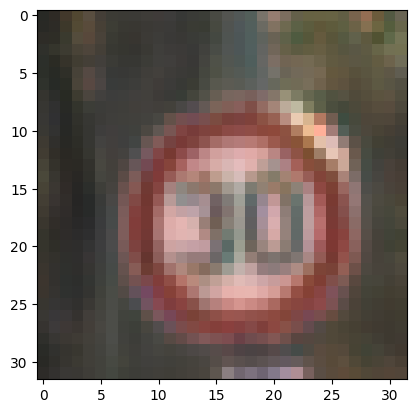

In [37]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

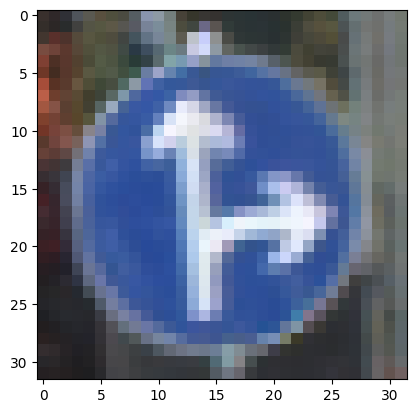

In [39]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

8

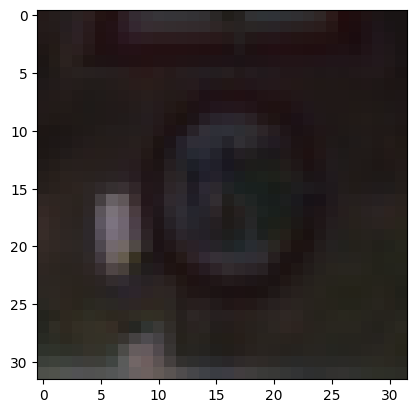

In [40]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

# **Preparação de Dados**

In [42]:
X_train, y_train = shuffle(X_train, y_train)

In [43]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [44]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [48]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

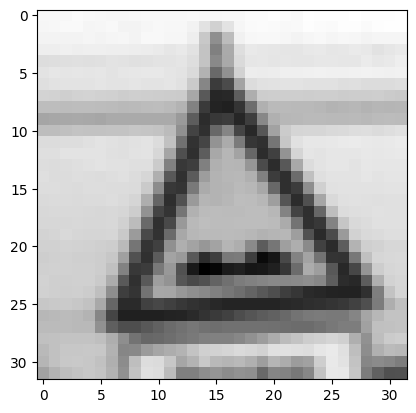

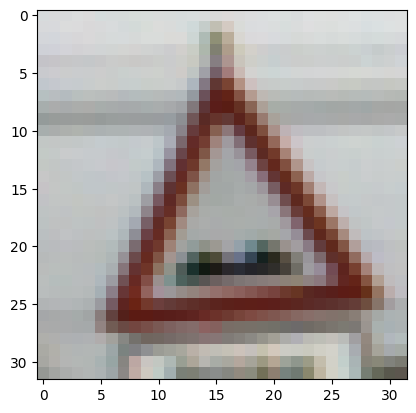

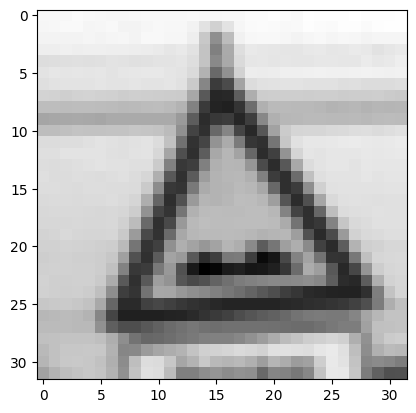

In [49]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

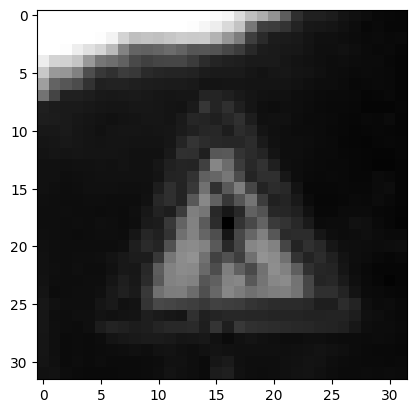

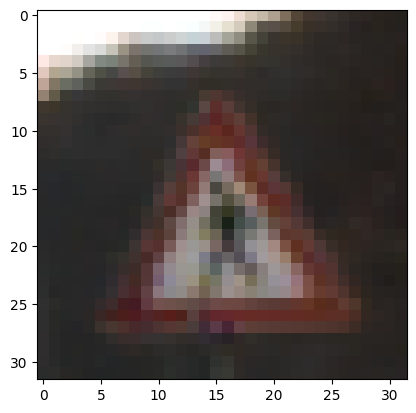

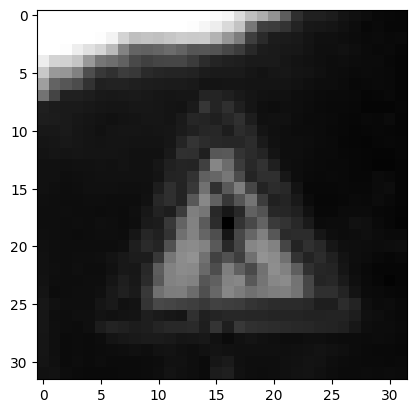

In [50]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

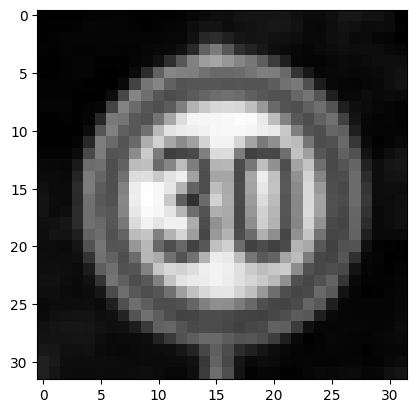

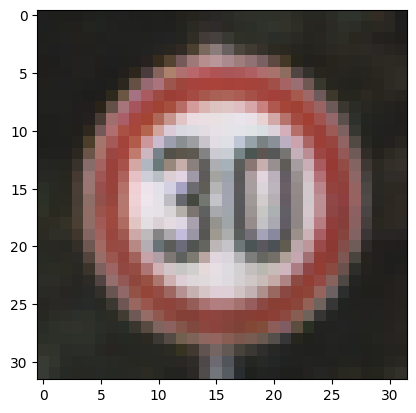

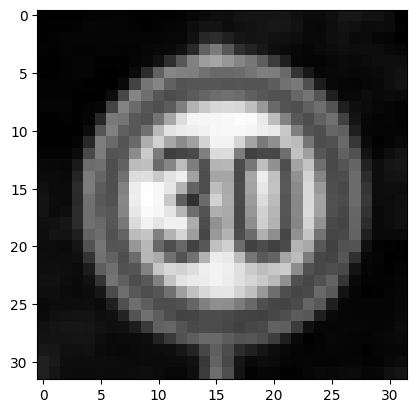

In [51]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
y = df.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

**Transformando as variaveis na mesma escala**

In [ ]:
#Essa função utiliza o desvio padrão para fazer o escalonamento
sc = StandardScaler()
x = sc.fit_transform(x)

# **Treinamento**

In [54]:
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [55]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [57]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 16s 214ms/step - loss: 3.1677 - accuracy: 0.1870 - val_loss: 2.7838 - val_accuracy: 0.2828
Epoch 2/50
70/70 [==============================] - 13s 188ms/step - loss: 1.6413 - accuracy: 0.5432 - val_loss: 1.4066 - val_accuracy: 0.5728
Epoch 3/50
70/70 [==============================] - 14s 197ms/step - loss: 0.9219 - accuracy: 0.7371 - val_loss: 0.9731 - val_accuracy: 0.7043
Epoch 4/50
70/70 [==============================] - 13s 184ms/step - loss: 0.6659 - accuracy: 0.8134 - val_loss: 0.8338 - val_accuracy: 0.7485
Epoch 5/50
70/70 [==============================] - 13s 192ms/step - loss: 0.5207 - accuracy: 0.8548 - val_loss: 0.7167 - val_accuracy: 0.7891
Epoch 6/50
70/70 [==============================] - 15s 208ms/step - loss: 0.4328 - accuracy: 0.8802 - val_loss: 0.6620 - val_accuracy: 0.8163
Epoch 7/50
70/70 [==============================] - 18s 261ms/step - loss: 0.3713 - accuracy: 0.8999 - val_loss: 0.6625 - val_accuracy: 0.8111

# **Avaliação do Modelo**

In [59]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.2814 - accuracy: 0.8595
Test Accuracy: 0.8594616055488586


In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<ipython-input-62-46d7eff3f114>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')


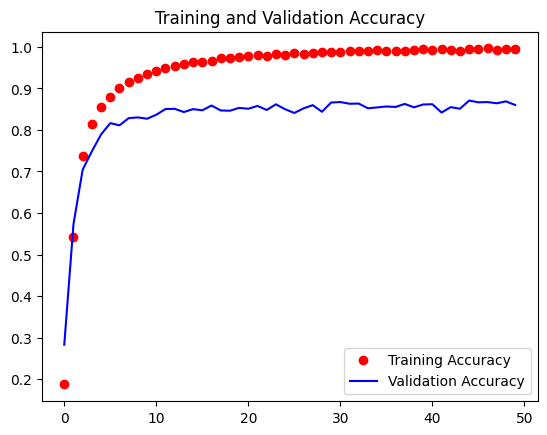

In [62]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

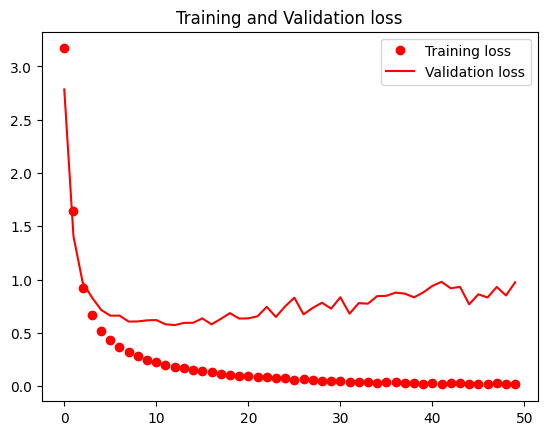

In [63]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [64]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 3s 8ms/step


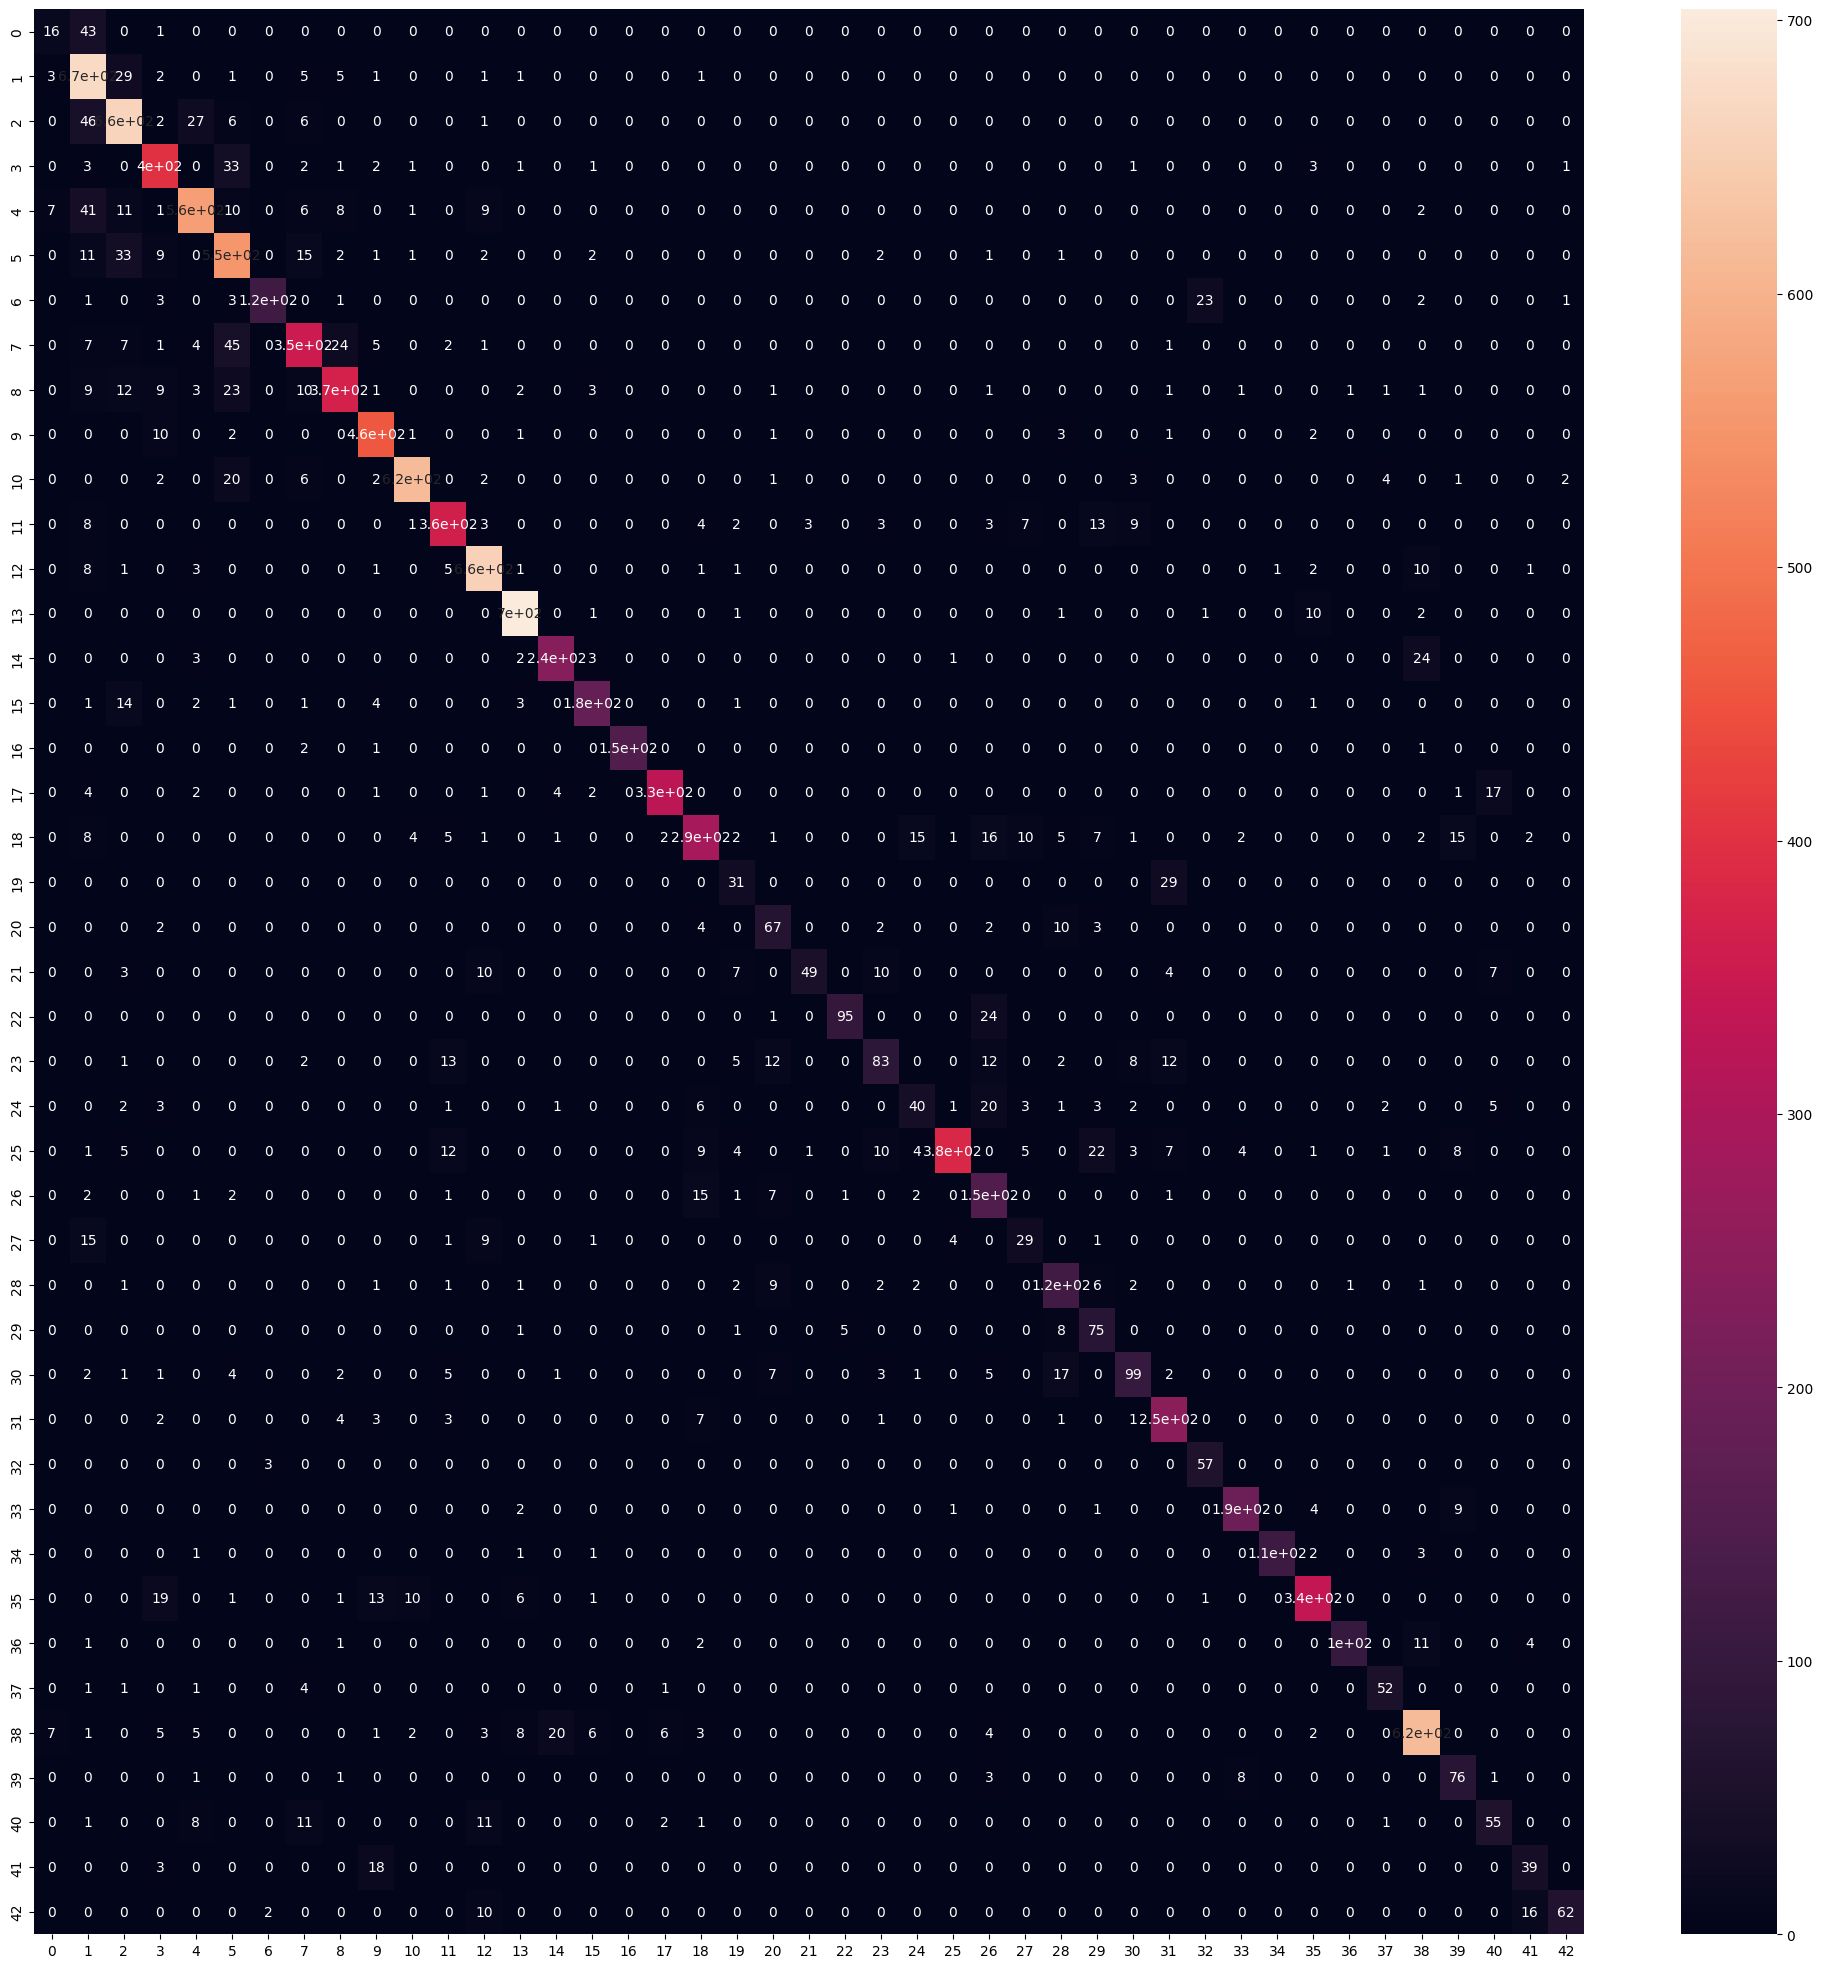

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

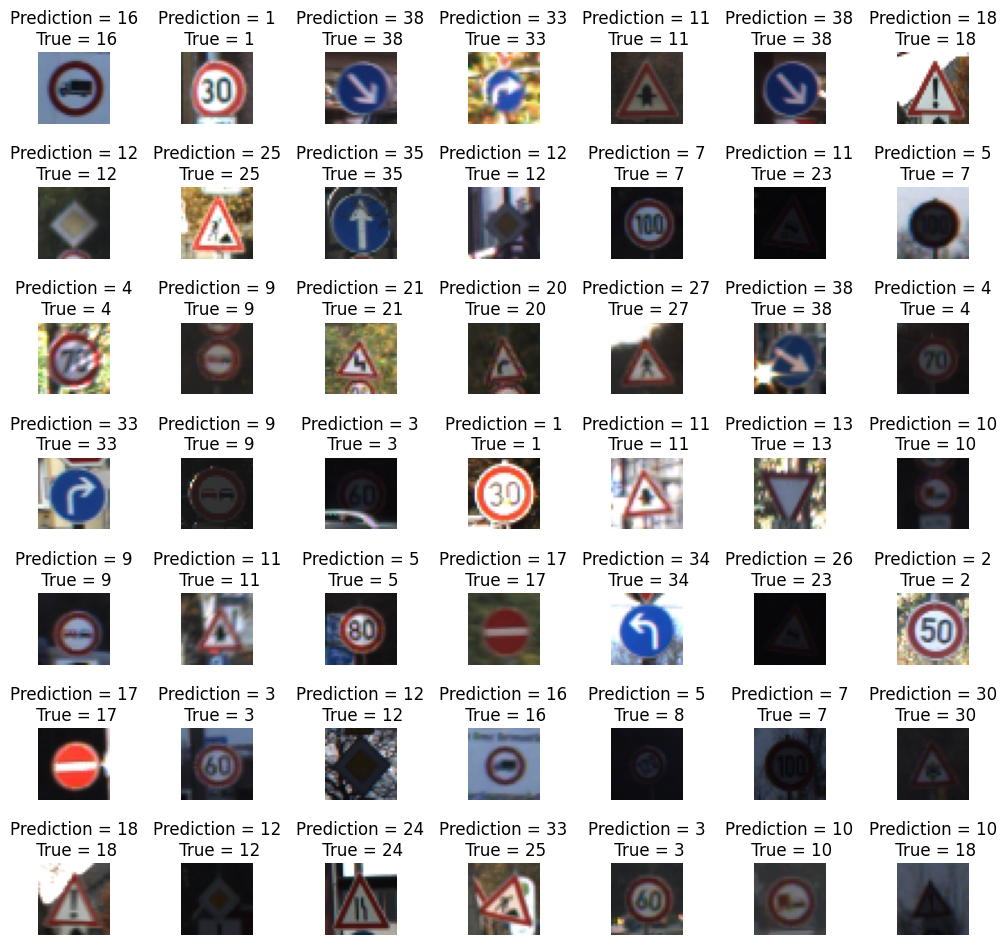

In [66]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)